# **Prediksi Penjualan Toko XYZ  Menggunakan RNNs untuk Periode Agustus - September 2024**

## **Deskripsi Dataset**

Dataset ini adalah data dummy penjualan dari Toko Elektronik  selama dua bulan, yaitu dari 1 Jnuari 2020 hingga 31 Oktober 2024. Dataset ini mencatat informasi transaksi harian dan detail penjualan produk elektronik yang dapat digunakan untuk memprediksi tren penjualan di masa mendatang dengan menggunakan model Recurrent Neural Networks (RNN). Model RNN akan dilatih pada dataset ini untuk menangkap pola-pola musiman atau tren yang berguna dalam memprediksi penjualan di masa mendatang.

Berikut merupakan deskripsi dari setiap atribut dalam dataset:




*   **Date**: Tanggal penjualan.
*   Product_Category: Kategori produk yang terjual (misalnya, Laptop, Smartphone, TV, dll.).
*  **Units_Sold**: Jumlah unit yang terjual pada hari tersebut.
*   **Unit_Price**: Harga satuan dari produk yang dijual.
*   **Total_Sales**: Total penjualan pada hari tersebut (dalam satuan mata uang tertentu, misalnya, IDR).
*   **Discount_Percentage**: Persentase diskon yang diberikan pada hari tersebut.
*   **Promotion**: Jenis promosi yang diterapkan pada hari tersebut (misalnya, "Buy 1 Get 1," "Holiday Discount," "No Promotion").
*   **Store_Location**: Lokasi toko tempat penjualan terjadi (misalnya, Jakarta, Bandung, Surabaya).
*   **Customer_Age_Group**: Kelompok umur pelanggan (misalnya, "<25", "25-35", "35-45", ">45").
*   **Payment_Method**: Metode pembayaran yang digunakan (misalnya, "Credit Card," "Debit Card," "Cash," "E-Wallet").












## Import Library

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load Dataset

In [9]:
# Load the dataset
df = pd.read_csv('/content/TokoElektonikXYZ.csv')
df.head()

,Date,Product_Category,Units_Sold,Unit_Price,Discount_Percentage,Promotion,Store_Location,Customer_Age_Group,Payment_Method,Total_Sales
0,2024-01-01,Headphones,1,1654146,15,No Promotion,Surabaya,<25,E-Wallet,1406024.1
1,2024-01-02,Camera,1,770846,10,Holiday Discount,Bandung,<25,Debit Card,693761.4
2,2024-01-03,TV,3,500404,20,Buy 1 Get 1,Jakarta,>45,Credit Card,1200969.6
3,2024-01-04,Camera,18,1458447,0,Holiday Discount,Surabaya,25-35,Debit Card,26252046.0
4,2024-01-05,Camera,10,1203286,25,Holiday Discount,Bandung,35-45,Cash,9024645.0


## EDA

In [10]:
# Melihat informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 305 non-null    object 
 1   Product_Category     305 non-null    object 
 2   Units_Sold           305 non-null    int64  
 3   Unit_Price           305 non-null    int64  
 4   Discount_Percentage  305 non-null    int64  
 5   Promotion            305 non-null    object 
 6   Store_Location       305 non-null    object 
 7   Customer_Age_Group   305 non-null    object 
 8   Payment_Method       305 non-null    object 
 9   Total_Sales          305 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 24.0+ KB


In [11]:
# Summary Dataset
df.describe()

,Units_Sold,Unit_Price,Discount_Percentage,Total_Sales
count,305.000000,3.050000e+02,305.000000,3.050000e+02
mean,10.039344,1.249740e+06,13.819672,1.092445e+07
std,5.647405,4.252021e+05,8.665016,7.500594e+06
min,1.000000,5.004040e+05,0.000000,5.030852e+05
25%,5.000000,8.895930e+05,10.000000,4.803867e+06
50%,10.000000,1.271954e+06,15.000000,9.637160e+06
75%,15.000000,1.590654e+06,20.000000,1.662207e+07
max,19.000000,1.998585e+06,25.000000,3.275334e+07


## Preprocessing

In [15]:
# Drop Atribut yang tidak diperlukan
df1 = df.drop(['Discount_Percentage','Product_Category','Promotion','Store_Location','Customer_Age_Group','Payment_Method'], axis=1)
df1

,Date,Units_Sold,Unit_Price,Total_Sales
0,2024-01-01,1,1654146,1406024.10
1,2024-01-02,1,770846,693761.40
2,2024-01-03,3,500404,1200969.60
3,2024-01-04,18,1458447,26252046.00
4,2024-01-05,10,1203286,9024645.00
...,...,...,...,...
300,2024-10-27,17,1448027,19693167.20
301,2024-10-28,13,851005,9403605.25
302,2024-10-29,1,1373172,1373172.00
303,2024-10-30,2,1022244,1737814.80


Text(0.5, 1.0, 'General Statistic of Penjualan Harian Toko XZY')

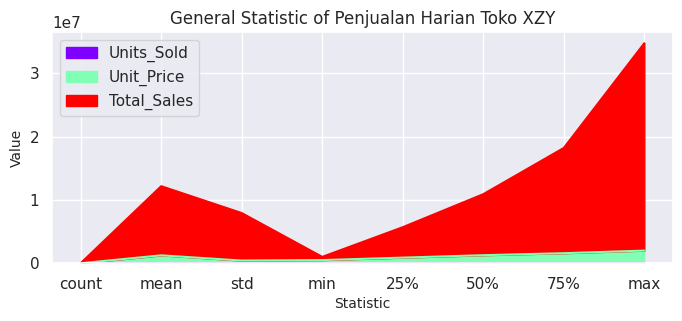

In [95]:
#melakukan visualisasi dari data describe

df1.describe().plot(kind='area', figsize = (8,3), colormap='rainbow')
plt.xlabel('Statistic', fontsize=10)
plt.ylabel('Value', fontsize=10)
plt.title("General Statistic of Penjualan Harian Toko XZY", fontsize=12)

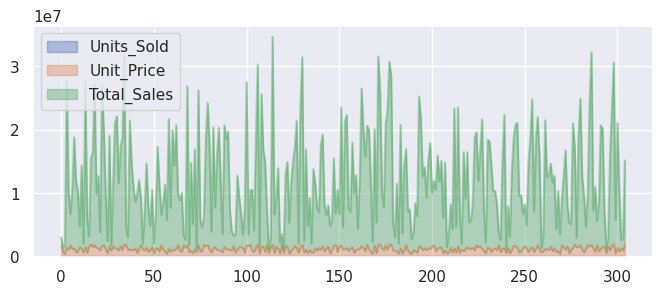

In [98]:
#visualisasi area plot
df1.plot.area(y=['Units_Sold','Unit_Price','Total_Sales'], alpha=0.4, figsize=(8,3));

In [19]:
# Pengecekan nilai kosong
df1.isna().sum()

,0
Date,0
Units_Sold,0
Unit_Price,0
Total_Sales,0


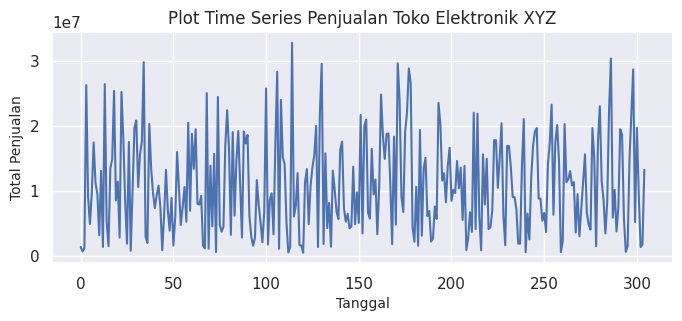

In [99]:
#Plot time series dari harga saham -- diambil harga penutupan (Close)
plt.figure(figsize=(8,3))
plt.title('Plot Time Series Penjualan Toko Elektronik XYZ', fontsize = 12)
plt.plot(df['Total_Sales'])
plt.xlabel('Tanggal', fontsize=10)
plt.ylabel('Total Penjualan', fontsize=10)
plt.show()

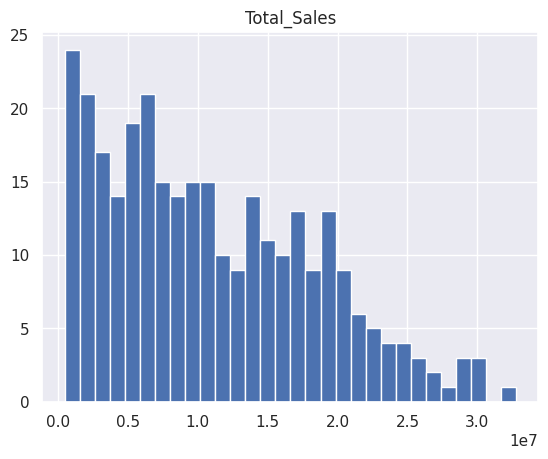

In [24]:
df.hist(column='Total_Sales', bins=30)
plt.show()

<Axes: ylabel='Total_Sales'>

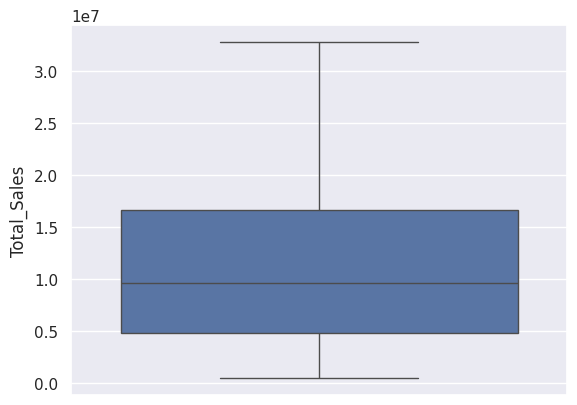

In [25]:
sns.boxplot(y='Total_Sales', data=df)

## Pembangunan Model

* Forcasting dengan LSTM

In [26]:
from numpy import array
import math
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM,Input

In [28]:
#akan diprediksi harga saham penutupan (Close)
df_p=df.filter(['Total_Sales'])

,Total_Sales
0,1406024.10
1,693761.40
2,1200969.60
3,26252046.00
4,9024645.00
...,...
300,19693167.20
301,9403605.25
302,1373172.00
303,1737814.80


In [29]:
#Mengaplikasikan MinMaxScaler untuk mengubah data di rentang 0 dan 1
#diubah dalam bentuk array dengan library numpy
scaler = MinMaxScaler(feature_range=(0,1))
df_s = scaler.fit_transform(np.array(df_p).reshape(-1,1))
df_s

array([[0.02799788],
       [0.00591239],
       [0.02163965],
       [0.79841108],
       [0.26423232],
       [0.13706307],
       [0.28590766],
       [0.52534615],
       [0.33326866],
       [0.27839337],
       [0.08357425],
       [0.39060078],
       [0.02782622],
       [0.80323272],
       [0.14893212],
       [0.03164962],
       [0.40262288],
       [0.44460279],
       [0.77072824],
       [0.24907737],
       [0.33850462],
       [0.07199182],
       [0.76566831],
       [0.54323412],
       [0.24505964],
       [0.04316035],
       [0.52739261],
       [0.00935418],
       [0.29823754],
       [0.59687339],
       [0.62981365],
       [0.31263385],
       [0.46932652],
       [0.52832077],
       [0.9076105 ],
       [0.07671077],
       [0.04682029],
       [0.61399852],
       [0.40402803],
       [0.28487729],
       [0.21218585],
       [0.27552247],
       [0.31969763],
       [0.21365099],
       [0.01226473],
       [0.17921306],
       [0.39501362],
       [0.202

In [30]:
#splitting data menjadi data train dan data test
training_size = int(len(df_s)*0.75)
test_size = len(df_s) - training_size

In [31]:

training_size, test_size

(228, 77)

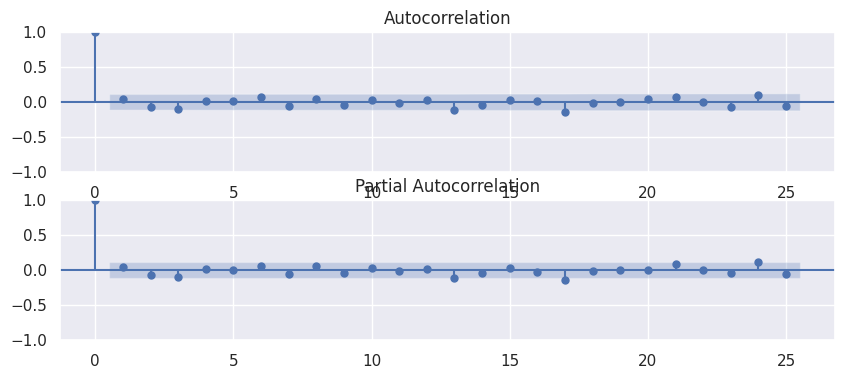

In [102]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import matplotlib.pyplot as plt

# Assuming 'Total_Sales' is the correct numerical column for ACF/PACF analysis:
fig, ax = plt.subplots(2, figsize=(10,4))

# Access the 'Total_Sales' column by name for clarity and robustness
ax[0] = plot_acf(df['Total_Sales'], ax=ax[0])
ax[1] = plot_pacf(df['Total_Sales'], ax=ax[1])

plt.show()

In [34]:

#Mengubah array menjadi data matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [35]:
time_step=4 #dilihat 5 lag terakhir yang keluar
X_train, Y_train = create_dataset(df_s[:training_size,:], time_step)
X_test, Y_test = create_dataset(df_s[training_size-time_step:,:], time_step)

In [36]:

print(X_train.shape), print(Y_train.shape)

(224, 4)
(224,)


(None, None)

In [37]:
#reshape input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [38]:
model = Sequential()
model.add(LSTM(145, return_sequences=False, input_shape=(time_step,1)))
model.add(Dense(65,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mape','mse'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 145)                 │          85,260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 65)                  │           9,490 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,816 (370.38 KB)

 Trainable params: 94,816 (370.38 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
history = model.fit(X_train, Y_train, epochs=30, verbose=1,batch_size=8,validation_data=(X_test,Y_test))

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0939 - mae: 0.2241 - mape: 218437.0156 - mse: 0.0939 - val_loss: 0.0594 - val_mae: 0.2110 - val_mape: 604.0305 - val_mse: 0.0594
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0579 - mae: 0.2027 - mape: 1127276.2500 - mse: 0.0579 - val_loss: 0.0590 - val_mae: 0.2127 - val_mape: 671.1913 - val_mse: 0.0590
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0528 - mae: 0.1882 - mape: 276656.7188 - mse: 0.0528 - val_loss: 0.0554 - val_mae: 0.2045 - val_mape: 630.0980 - val_mse: 0.0554
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0524 - mae: 0.1910 - mape: 336327.6250 - mse: 0.0524 - val_loss: 0.0549 - val_mae: 0.2039 - val_mape: 653.4089 - val_mse: 0.0549
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0521 - mae: 0.1921 - mape: 3115517.2500 - mse: 0.0521 - val_loss: 0.0537 - val_mae: 0.2008 - val_mape: 642.0906 - val_mse: 0.0537
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/ste

<Figure size 640x480 with 0 Axes>

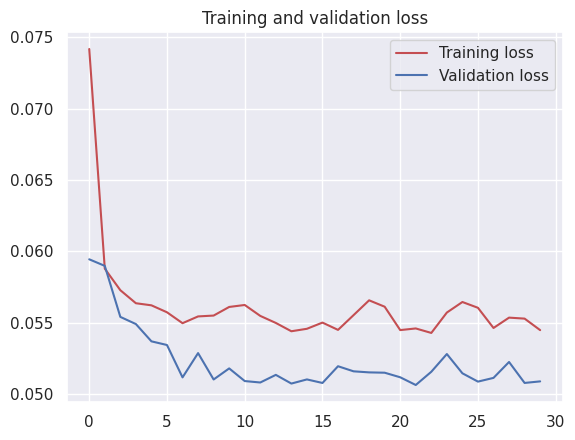

<Figure size 640x480 with 0 Axes>

In [77]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
mae=history.history['mae']
val_mae=history.history['val_mae']
mape=history.history['mape']
val_mape=history.history['val_mape']
mse=history.history['mse']
val_mse=history.history['val_mse']

epochs=range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

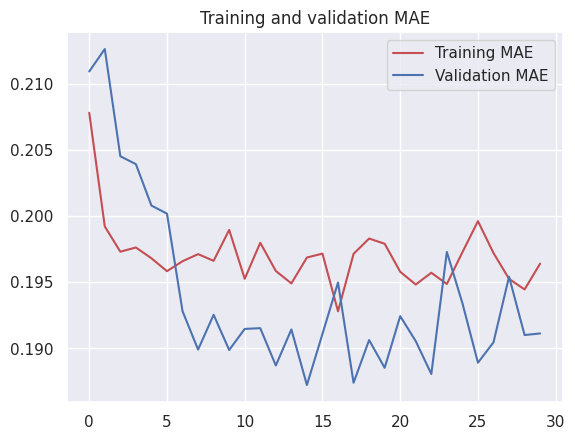

<Figure size 640x480 with 0 Axes>

In [78]:
plt.plot(epochs, mae, 'r', label = 'Training MAE')
plt.plot(epochs, val_mae, 'b', label ='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

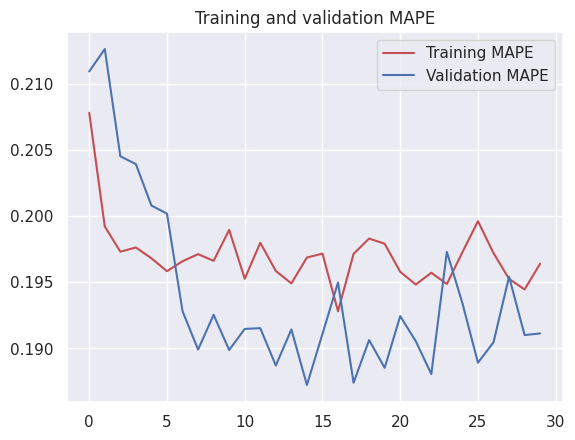

<Figure size 640x480 with 0 Axes>

In [79]:
plt.plot(epochs, mae, 'r', label = 'Training MAPE')
plt.plot(epochs, val_mae, 'b', label ='Validation MAPE')
plt.title('Training and validation MAPE')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

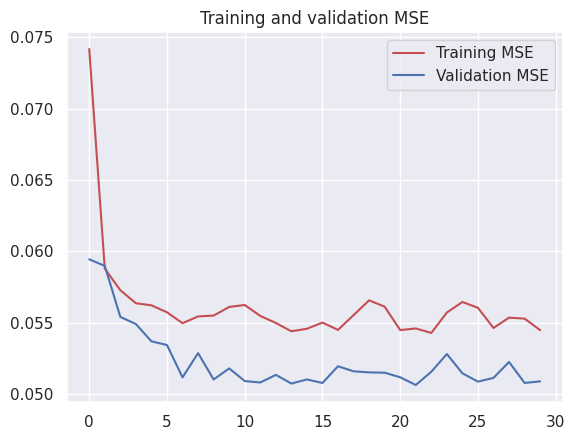

<Figure size 640x480 with 0 Axes>

In [80]:
plt.plot(epochs, mse, 'r', label = 'Training MSE')
plt.plot(epochs, val_mse, 'b', label ='Validation MSE')
plt.title('Training and validation MSE')
plt.legend()
plt.figure()

In [81]:
test_predict = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [43]:
test_predict1 = scaler.inverse_transform(test_predict)
test_predict1

array([[11340060.],
       [11453874.],
       [11609104.],
       [11336202.],
       [11146129.],
       [11265442.],
       [11503424.],
       [11475032.],
       [11424130.],
       [11440746.],
       [11418667.],
       [11173992.],
       [11040642.],
       [11416694.],
       [11525140.],
       [11504504.],
       [11156474.],
       [11145118.],
       [11178628.],
       [11346108.],
       [11532274.],
       [11551030.],
       [11518654.],
       [11365684.],
       [11379051.],
       [11194568.],
       [11158688.],
       [11175042.],
       [11515296.],
       [11453777.],
       [11377060.],
       [11331687.],
       [11653857.],
       [11609673.],
       [11167719.],
       [11149539.],
       [11313562.],
       [11443087.],
       [11370751.],
       [11377421.],
       [11483507.],
       [11369828.],
       [11407432.],
       [11292847.],
       [11259737.],
       [11159581.],
       [11374774.],
       [11479915.],
       [11467940.],
       [11118696.],


In [44]:
#RMSE
import math
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(np.mean(((test_predict1- df_p[training_size:])**2)))
rmse

7274313.853911286

<ipython-input-104-a01c97906c24>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = test_predict1


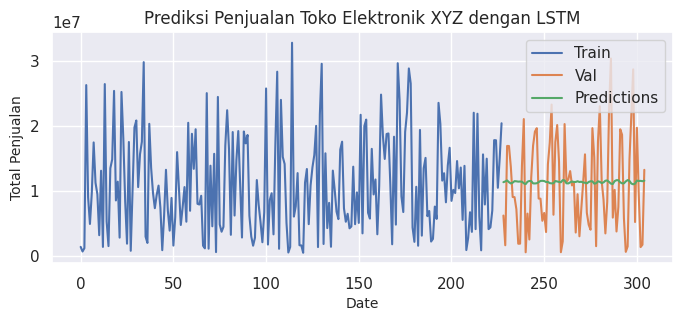

In [104]:
train = df[:training_size]
valid = df[training_size:]
valid['Predictions'] = test_predict1
plt.figure(figsize=(8,3))
plt.title('Prediksi Penjualan Toko Elektronik XYZ dengan LSTM', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Total Penjualan', fontsize=10)
plt.plot(train['Total_Sales'])
plt.plot(valid[['Total_Sales', 'Predictions']])
plt.legend([ 'Train','Val', 'Predictions'], loc='upper right')
plt.show()

## Forecasting dengan RNN

In [47]:
model2 = Sequential()
model2.add(SimpleRNN(145, return_sequences=False, input_shape=(time_step,1)))
model2.add(Dense(65,activation='tanh'))
model2.add(Dense(1))
model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae','mape','mse'])
model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 145)                 │          21,315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 65)                  │           9,490 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,871 (120.59 KB)

 Trainable params: 30,871 (120.59 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
history_RNN = model2.fit(X_train, Y_train, epochs=30, verbose=1,batch_size=8,validation_data=(X_test,Y_test))

Epoch 1/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1015 - mae: 0.2544 - mape: 3248460.2500 - mse: 0.1015 - val_loss: 0.0573 - val_mae: 0.2025 - val_mape: 529.6831 - val_mse: 0.0573
Epoch 2/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0774 - mae: 0.2256 - mape: 121600.7656 - mse: 0.0774 - val_loss: 0.0578 - val_mae: 0.2092 - val_mape: 660.8523 - val_mse: 0.0578
Epoch 3/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0657 - mae: 0.2099 - mape: 1851566.1250 - mse: 0.0657 - val_loss: 0.0648 - val_mae: 0.2008 - val_mape: 394.7935 - val_mse: 0.0648
Epoch 4/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0580 - mae: 0.1934 - mape: 2824660.0000 - mse: 0.0580 - val_loss: 0.0536 - val_mae: 0.1999 - val_mape: 721.5651 - val_mse: 0.0536
Epoch 5/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0548 - mae: 0.1960 - mape: 462911.8438 - mse: 0.0548 - val_loss: 0.0575 - val_mae: 0.2040 - val_mape: 653.8307 - val_mse: 0.0575
Epoch 6/30
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

<Figure size 640x480 with 0 Axes>

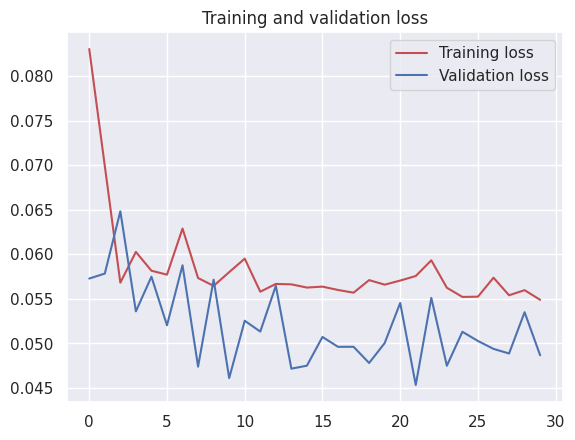

<Figure size 640x480 with 0 Axes>

In [71]:
loss=history_RNN.history['loss']
val_loss=history_RNN.history['val_loss']
mae=history_RNN.history['mae']
val_mae=history_RNN.history['val_mae']
mape=history_RNN.history['mape']
val_mape=history_RNN.history['val_mape']
mse=history_RNN.history['mse']
val_mse=history_RNN.history['val_mse']

epochs=range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label ='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

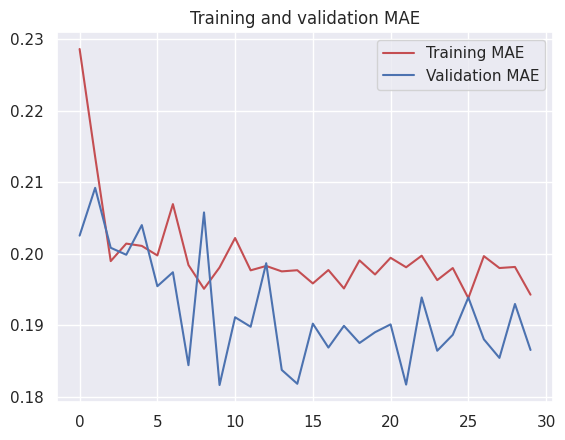

<Figure size 640x480 with 0 Axes>

In [72]:
plt.plot(epochs, mae, 'r', label = 'Training MAE')
plt.plot(epochs, val_mae, 'b', label ='Validation MAE')
plt.title('Training and validation MAE')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

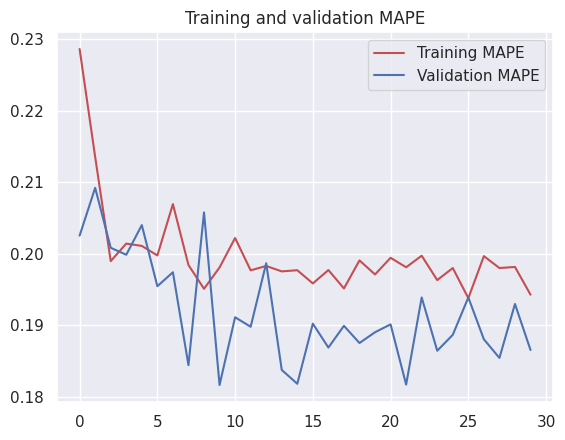

<Figure size 640x480 with 0 Axes>

In [73]:
plt.plot(epochs, mae, 'r', label = 'Training MAPE')
plt.plot(epochs, val_mae, 'b', label ='Validation MAPE')
plt.title('Training and validation MAPE')
plt.legend()
plt.figure()

<Figure size 640x480 with 0 Axes>

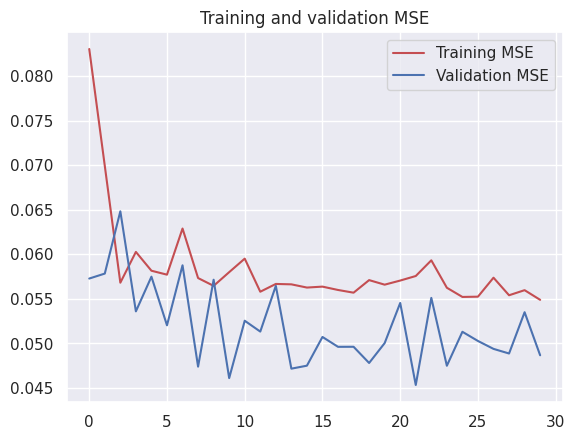

<Figure size 640x480 with 0 Axes>

In [74]:
plt.plot(epochs, mse, 'r', label = 'Training MSE')
plt.plot(epochs, val_mse, 'b', label ='Validation MSE')
plt.title('Training and validation MSE')
plt.legend()
plt.figure()

In [50]:
test_predict_RNN = model2.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step


In [51]:
test_predict2 = scaler.inverse_transform(test_predict_RNN)
test_predict2

array([[11641055.],
       [10792277.],
       [10805695.],
       [11890844.],
       [11399987.],
       [10733181.],
       [11115125.],
       [11259910.],
       [11231518.],
       [10937621.],
       [11053252.],
       [11505408.],
       [11398319.],
       [10361564.],
       [10973106.],
       [11585653.],
       [11106415.],
       [11440480.],
       [11054594.],
       [11213717.],
       [10974286.],
       [11155429.],
       [11373293.],
       [11108608.],
       [11097546.],
       [11304934.],
       [11401696.],
       [11141208.],
       [10808983.],
       [11287332.],
       [11893510.],
       [10852926.],
       [10755840.],
       [11222137.],
       [11935630.],
       [11002105.],
       [10662966.],
       [11523841.],
       [11147370.],
       [11165966.],
       [11018631.],
       [11210216.],
       [11174730.],
       [10968885.],
       [11412539.],
       [11171019.],
       [10868809.],
       [10918589.],
       [11312036.],
       [11538610.],


In [52]:
#RMSE RNN
rmse_RNN=np.sqrt(np.mean(((test_predict2- df_p[training_size:])**2)))
rmse_RNN

7114858.80891944

<ipython-input-105-a6f873b58b2c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = test_predict2


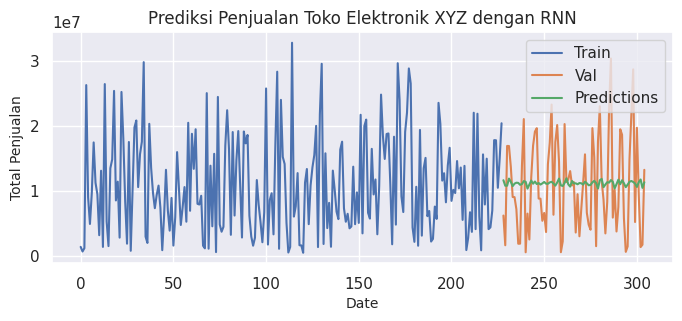

In [105]:
train = df[:training_size]
valid = df[training_size:]
valid['Predictions'] = test_predict2
plt.figure(figsize=(8,3))
plt.title('Prediksi Penjualan Toko Elektronik XYZ dengan RNN', fontsize=12)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Total Penjualan', fontsize=10)
plt.plot(train['Total_Sales'])
plt.plot(valid[['Total_Sales','Predictions']])
plt.legend([ 'Train','Val','Predictions'], loc='upper right')
plt.show()